## Resources:
- [Read excel multiple sheets in Pandas](https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/)
- [Concatenate multiple excel sheets into one DataFrame](https://www.youtube.com/watch?v=qJzAIDKfTQk)
- [Unique rows of column](https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas)

## Import statements

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, euclidean
from scipy import stats
import folium
import pickle
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame

### Apply pre-processing for NULL values

In [2]:
# Verify exported csv data
# df_all_stations = pd.read_csv("../Data/graph_stations_nan.csv")
# df_all_stations = pd.read_csv("../Data/graph_stations.csv")
# df_all_stations = pd.read_csv("../Data/all_stations_null.csv")
df_all_stations = pd.read_csv("../Data/Save/Temperature_graph_stations_306227.csv")

In [3]:
df_stations = pd.read_csv("../Data/stations.csv")

In [5]:
# Load the adjacency matrix from the file.
with open("../Data/adj_matrix.pkl", "rb") as f:
    adj_matrix = pickle.load(f)

In [4]:
with open("../Data/euclidean_adj_matrix.pkl", "rb") as f:
    adj_matrix = pickle.load(f)

In [6]:
adj_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.000000,7.151859,9.785663,4.348494,5.778005,9.782134,12.138693,9.218650,7.988721,14.080539,...,10.579399,7.172719,10.877401,4.396853,5.635375,12.501663,4.722825,5.771235,12.546138,5.853863
1,7.151859,0.000000,4.924683,2.970269,4.310881,3.030800,5.260977,3.433511,1.668303,8.642505,...,3.431687,1.001841,4.299876,4.065124,1.937735,6.122491,4.127045,5.487632,7.810487,3.439259
2,9.785663,4.924683,0.000000,6.959598,9.105181,3.140824,4.217617,1.650606,6.275736,4.300047,...,4.933986,5.901819,2.876490,8.467469,6.531788,3.408724,5.091660,4.790261,2.986168,8.253969
3,4.348494,2.970269,6.959598,0.000000,2.739718,5.905455,8.204934,5.842885,3.641297,11.102504,...,6.370201,2.831488,7.131551,1.580674,1.288756,8.910275,3.376537,5.129542,9.943862,2.206354
4,5.778005,4.310881,9.105181,2.739718,0.000000,7.248911,9.260355,7.718427,3.782224,12.953358,...,7.014139,3.516810,8.524794,1.483138,2.586620,10.352856,6.115929,7.868633,12.058221,0.872068
5,9.782134,3.030800,3.140824,5.905455,7.248911,0.000000,2.356560,1.610322,3.725307,5.854938,...,1.818922,3.734039,1.277442,7.095247,4.967825,3.106687,5.741346,6.374541,5.431411,6.382265
6,12.138693,5.260977,4.217617,8.204934,9.260355,2.356560,0.000000,3.369769,5.517485,4.837113,...,2.396354,5.788438,1.459296,9.295641,7.181427,1.713607,8.008890,8.427190,5.225899,8.419278
7,9.218650,3.433511,1.650606,5.842885,7.718427,1.610322,3.369769,0.000000,4.664615,5.281600,...,3.427489,4.368611,1.913373,7.252160,5.203152,3.292370,4.771845,5.057598,4.384165,6.851431
8,7.988721,1.668303,6.275736,3.641297,3.782224,3.725307,5.517485,4.664615,0.000000,9.578437,...,3.232150,0.903560,4.954566,4.137746,2.353355,6.747860,5.668940,7.122150,9.005472,2.984228
9,14.080539,8.642505,4.300047,11.102504,12.953358,5.854938,4.837113,5.281600,9.578437,0.000000,...,6.993499,9.498043,4.680347,12.533375,10.476913,3.134613,9.371201,8.826018,1.904206,12.081755


In [6]:
from_all_stations = np.sort(df_all_stations["StasName"].unique())
from_all_stations

array(['ALEXANDERBAAI', 'BEAUFORT-WES', 'BLOEMFONTEIN WO', 'CALVINIA WO',
       'CAPE TOWN WO', 'CRADOCK-MUN', 'EAST LONDON WO', 'GARIEP DAM',
       'GEORGE WO', 'GREYTOWN', 'KIMBERLEY WO',
       'KING SHAKA INTERNATIONAL AIRPORT WO', 'KNELLPOORTDAM', 'KOKSTAD',
       'KROONSTAD', 'LADYSMITH', 'MOOI RIVER', 'PORT ELIZABETH AWOS',
       'PRINS ALBERT-SWARTRIVIER', 'QUEENSTOWN', 'REDELINGSHUYS-AWS',
       'SUTHERLAND', 'UMTHATHA WO', 'UPINGTON WO', 'VAN ZYLSRUS',
       'WARDEN-HERITAGE', 'WORCESTER-AWS'], dtype=object)

In [10]:
# Loop through df_stations and replace the station names in df_all_stations
for index, row in df_stations.iterrows():
    df_all_stations.loc[df_all_stations['StasName'] == from_all_stations[index], 'StasName'] = df_stations['Name'][index]
    # print(f"{df_all_stations.loc[df_all_stations['StasName'] == from_all_stations[index], 'StasName']}, {df_stations['Name'][index]}")
    # break

In [11]:
from_all_stations = np.sort(df_all_stations["StasName"].unique())
from_all_stations

array(['ALEXANDERBAAI', 'BEAUFORT-WES', 'BLOEMFONTEIN WO', 'CALVINIA WO',
       'CAPE TOWN WO', 'CRADOCK-MUN', 'EAST LONDON WO', 'GARIEP DAM',
       'GEORGE WO', 'GREYTOWN', 'KIMBERLEY WO',
       'KING SHAKA INTERNATIONAL AIRPORT WO', 'KNELLPOORTDAM', 'KOKSTAD',
       'KROONSTAD', 'LADYSMITH', 'MOOI RIVER', 'PORT ELIZABETH AWOS',
       'PRINS ALBERT-SWARTRIVIER', 'QUEENSTOWN', 'REDELINGSHUYS-AWS',
       'SUTHERLAND', 'UMTHATHA WO', 'UPINGTON WO', 'VAN ZYLSRUS',
       'WARDEN-HERITAGE', 'WORCESTER-AWS'], dtype=object)

In [30]:
df_all_stations.isna().sum()

StasName         0
Latitude         0
Longitude        0
DateT            0
Temperature      0
Rain             0
Humidity         0
WindDirection    0
WindSpeed        0
Pressure         0
dtype: int64

In [8]:
df_all_stations[df_all_stations["Latitude"].isna() == True]

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure


In [18]:
# Assign Latitude and Longitude to df_all_stations[df_all_stations["StasName"] == "WARDEN-HERITAGE"]
# df_all_stations.loc[df_all_stations['StasName'] == 'WARDEN-HERITAGE', 'DateT'] = 'WARDEN-HERITAGE'
# df_all_stations.loc[df_all_stations['StasName'] == 'PRINS ALBERT-SWARTRIVIER', 'Latitude'] = -33.1734
df_all_stations.loc[df_all_stations['StasName'] == 'WARDEN-HERITAGE', 'Longitude'] = 29.06

In [19]:
df_all_stations.loc[df_all_stations['StasName'] == 'PRINS ALBERT-SWARTRIVIER']

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
301035,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2013-04-30 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
301063,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2013-04-30 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
301067,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2013-04-30 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
301092,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2013-04-30 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
301130,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2013-04-30 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1695461,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2019-03-25 18:00:00,22.0,0.0,52.0,148.0,6.3,955.2
1695467,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2019-03-25 19:00:00,19.7,0.0,58.0,148.0,6.2,955.7
1695517,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2019-03-25 20:00:00,19.2,0.0,56.0,147.0,5.4,955.9
1695541,PRINS ALBERT-SWARTRIVIER,-33.1734,22.0293,2019-03-25 21:00:00,19.0,0.0,56.0,147.0,5.1,957.1


In [26]:
df_all_stations.isna().sum()

StasName            0
Latitude            0
Longitude           0
DateT               0
Temperature         0
Rain                0
Humidity            0
WindDirection       0
WindSpeed           0
Pressure         5503
dtype: int64

#### Total number of records per station

In [7]:
# Get the unique StasNames
unique_stasnames = df_all_stations['StasName'].unique()

# Create a dictionary to store the number of total values for each column
column_total_values = {}

for stasname in unique_stasnames:
    # Get the number of total values for each column for the current StasName
    total_values = df_all_stations[df_all_stations['StasName'] == stasname].count()

    # Add the number of total values to the dictionary
    column_total_values[stasname] = total_values

# Create a DataFrame from the dictionary
df_total_stations = pd.DataFrame.from_dict(column_total_values, orient='index')
df_total_stations.drop(columns=['StasName','DateT'], inplace=True)

# Find total for each station
totals = []
for station in df_total_stations.index:
    totals.append(sum([
        int(df_total_stations['Temperature'][station]),
        int(df_total_stations['Rain'][station]),
        int(df_total_stations['Humidity'][station]),
        int(df_total_stations['WindDirection'][station]),
        int(df_total_stations['WindSpeed'][station]),
        int(df_total_stations['Pressure'][station])
    ]))
# Add Total column to DataFrame
df_total_stations['Total'] = totals

In [8]:
df_total_stations

,Latitude,Longitude,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure,Total
QUEENSTOWN,87657,87657,78529,78529,78529,78529,78529,78529,471174
UMTHATHA WO,87657,87657,78868,78868,78868,78868,78868,78868,473208
GEORGE WO,87657,87657,78889,78889,78889,78889,78889,78889,473334
KROONSTAD,87657,87657,87633,87633,87633,87633,87633,87633,525798
ALEXANDERBAAI,87657,87657,78889,78889,78889,78889,78889,78889,473334
KOKSTAD,87657,87657,87585,87585,87585,87585,87585,87585,525510
WORCESTER-AWS,87657,87657,78889,78889,78889,78889,78889,78889,473334
EAST LONDON WO,87657,87657,78889,78889,78889,78889,78889,78889,473334
GARIEP DAM,87657,87657,87657,87657,87657,87657,87657,87657,525942
BEAUFORT-WES,87657,87657,78889,78889,78889,78889,78889,78889,473334


### Total number of NULL values per station

In [9]:
# Get the unique StasNames
unique_stasnames = df_all_stations['StasName'].unique()

# Create a dictionary to store the number of null values for each column
column_null_values = {}

for stasname in unique_stasnames:
    # Get the number of null values for each column for the current StasName
    null_values = df_all_stations[df_all_stations['StasName'] == stasname].isna().sum()

    # Add the number of null values to the dictionary
    column_null_values[stasname] = null_values

# Create a DataFrame from the dictionary
df_null_stations = pd.DataFrame.from_dict(column_null_values, orient='index')
df_null_stations.drop(columns=['StasName','DateT'], inplace=True)

# Find total for each station
totals = []
for station in df_null_stations.index:
    totals.append(sum([
        int(df_null_stations['Temperature'][station]),
        int(df_null_stations['Rain'][station]),
        int(df_null_stations['Humidity'][station]),
        int(df_null_stations['WindDirection'][station]),
        int(df_null_stations['WindSpeed'][station]),
        int(df_null_stations['Pressure'][station])
    ]))
# Add Total column to DataFrame
df_null_stations['Total'] = totals

In [10]:
df_null_stations

,Latitude,Longitude,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure,Total
QUEENSTOWN,0,0,9128,9128,9128,9128,9128,9128,54768
UMTHATHA WO,0,0,8789,8789,8789,8789,8789,8789,52734
GEORGE WO,0,0,8768,8768,8768,8768,8768,8768,52608
KROONSTAD,0,0,24,24,24,24,24,24,144
ALEXANDERBAAI,0,0,8768,8768,8768,8768,8768,8768,52608
KOKSTAD,0,0,72,72,72,72,72,72,432
WORCESTER-AWS,0,0,8768,8768,8768,8768,8768,8768,52608
EAST LONDON WO,0,0,8768,8768,8768,8768,8768,8768,52608
GARIEP DAM,0,0,0,0,0,0,0,0,0
BEAUFORT-WES,0,0,8768,8768,8768,8768,8768,8768,52608


In [11]:
type(df_null_stations['Total'])

pandas.core.series.Series

In [12]:
# Calculate percentage of Missing values for each station, station with % > 10% will be droped
print(((df_null_stations['Total']) / df_total_stations['Total']).map('{:.2%}'.format))

QUEENSTOWN                             11.62%
UMTHATHA WO                            11.14%
GEORGE WO                              11.11%
KROONSTAD                               0.03%
ALEXANDERBAAI                          11.11%
KOKSTAD                                 0.08%
WORCESTER-AWS                          11.11%
EAST LONDON WO                         11.11%
GARIEP DAM                              0.00%
BEAUFORT-WES                           11.11%
MOOI RIVER                              0.00%
CRADOCK-MUN                            11.11%
CALVINIA WO                            11.11%
CAPE TOWN WO                           11.11%
BLOEMFONTEIN WO                         0.00%
LADYSMITH                               3.13%
SUTHERLAND                             11.11%
REDELINGSHUYS-AWS                      11.11%
VAN ZYLSRUS                            11.15%
KIMBERLEY WO                           11.11%
PORT ELIZABETH AWOS                    11.11%
PRINS ALBERT-SWARTRIVIER          

### Inverse Distance Weight Interpolation formulation
- [YouTube](https://www.youtube.com/watch?v=k1t69Q1xkPU)
- [YouTube](https://www.youtube.com/watch?v=_TU8uRK-0NI)
- [Imputing Missing Values Using Inverse Distance Weighted Interpolation for Time Series Data](https://ieeexplore.ieee.org/document/7229721)

$\hat{X} = \sum_{i=1}^N X_i \times \theta_i$ ; $X_i$ is the value, e.g Temperature and $\theta_i$ is the weight

$\theta_i = \frac{\frac{1}{d_i^p}} {\sum_{i=1}^N\frac{1}{d_i^p}} $ ; $d_i$ is the distance, $p$ changes from 1 to 4

In [5]:
# get_station_index function
def get_station_index(station_name):
    """
    Returns the index of the station in the DataFrame.
    """
    return df_stations[df_stations["Name"] == station_name].index[0]

In [6]:
def adj_matrix_of_nearby_stations(station_name, radius=3):
    """
    Return: distance values of nearby stations from given station within a given radius
    """
    station_index = get_station_index(station_name)
    return adj_matrix[station_index].sort_values()[1:radius + 1]

In [7]:
# Loop through pandas series by index and value
# for index, value in near_st.items():
#     print(f"{index}: {value}")

def calculate_station_weights(station_distances, p=2):
    """
    Calculate Theta, i.e weights of nearby stations and return a list of weights
    """
    theta = []
    for index, value in station_distances.items():
        theta.append((1 / value ** p) / sum(1 / station_distances.values ** p))
    return theta

#### Put everything together for IDW

In [8]:
# columns = ["Temperature", "Rain", "Humidity", "WindDirection", "WindSpeed", "Pressure"]
columns = ["Temperature"]
radius = 3  # Radius of 3 stations

for column in columns:
    print(f"Processing column: {column}")
    count = 0
    for index, row in df_all_stations.iterrows():
        if pd.isnull(row[column]):
            count += 1
            print(f"Index: {index}, Count: {count}")

            if count == 1000:
                df_all_stations.to_csv("../Data/Save/" + str(column) + "_graph_stations_" + str(index) + ".csv", index=False)
                count = 0
            
            # Get adjacency matrix values of nearby stations
            near_by_stations_adj = adj_matrix_of_nearby_stations(row['StasName'], radius)
            # Calculate weights of nearby stations
            near_by_stations_weights = calculate_station_weights(near_by_stations_adj)
            # print(f"Nearby Stations Adj: {near_by_stations_adj}")
            # print(f"Nearby Stations Weights: {near_by_stations_weights}")

            # Fo every station adjacency index value, get its name and use it to find column value at that StasName and DateT
            Col_value = [] # E.g Temperature, Humidit, etc
            # print(f"Nearby Stations: {near_by_stations_adj}")
            for indx in near_by_stations_adj.index:
                # print(f"Col_value: {Col_value}")
                # print(f"indx: {indx}")
                # Assign variable date_time depending on If df_all_stations['DateT'] == row['DateT'], else add 1 hour to row['DateT']
                new_date_time = row['DateT'] if df_all_stations[(df_all_stations['StasName'] == df_stations.loc[indx, "Name"]) & (df_all_stations['DateT'] == row['DateT'])].shape[0] > 0 else pd.to_datetime(row['DateT']) + pd.Timedelta(hours=1)
                # print(f"new_date_time: {new_date_time}")
                # print(f"ROW: {df_all_stations.loc[index]}")
                # print(f"STATION: {df_all_stations[(df_all_stations['StasName'] == df_stations.loc[indx, 'Name']) & (df_all_stations['DateT'] == new_date_time)]}")
                station_df = df_all_stations[(df_all_stations['StasName'] == df_stations.loc[indx, 'Name']) & (df_all_stations['DateT'] == new_date_time)]
                if station_df.empty:
                    value = 0
                    # print("Station empty")
                else:
                    value = station_df[column].values[0]
                # if value is NAN append 0, else value
                Col_value.append(0 if pd.isnull(value) else value)

            # Calculate Value_hat, e.g new value for Temperature, Humidity, etc
            Value_hat = 0
            for i in range(len(Col_value)):
                Value_hat += near_by_stations_weights[i] * Col_value[i]

            # Round accordingly
            if not isinstance(Value_hat, int):
                Value_hat = np.round(Value_hat, decimals=1)

            # Write the new value to the original DataFrame to replace the NaN value    
            df_all_stations.at[index, column] = Value_hat
            # break

Processing column: Temperature
Index: 306227, Count: 1
Index: 306256, Count: 2
Index: 306276, Count: 3
Index: 306291, Count: 4
Index: 306323, Count: 5
Index: 306352, Count: 6
Index: 306381, Count: 7
Index: 306402, Count: 8
Index: 306444, Count: 9
Index: 306460, Count: 10
Index: 306487, Count: 11
Index: 306522, Count: 12
Index: 306556, Count: 13
Index: 306572, Count: 14
Index: 306605, Count: 15
Index: 306632, Count: 16
Index: 306662, Count: 17
Index: 306681, Count: 18
Index: 306717, Count: 19
Index: 306723, Count: 20
Index: 306751, Count: 21
Index: 306796, Count: 22
Index: 306822, Count: 23
Index: 306837, Count: 24
Index: 306861, Count: 25
Index: 306906, Count: 26
Index: 306910, Count: 27
Index: 306960, Count: 28
Index: 306986, Count: 29
Index: 306995, Count: 30
Index: 307024, Count: 31
Index: 307067, Count: 32
Index: 307083, Count: 33
Index: 307100, Count: 34
Index: 307142, Count: 35
Index: 307155, Count: 36
Index: 307170, Count: 37
Index: 307197, Count: 38
Index: 307223, Count: 39
Ind

In [28]:
df_all_stations.to_csv("../Data/Save/" + str(column) + "_graph_stations_" + str(index) + ".csv", index=False)

In [16]:
df_all_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366739 entries, 0 to 2366738
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   StasName       object 
 1   Latitude       float64
 2   Longitude      float64
 3   DateT          object 
 4   Temperature    float64
 5   Rain           float64
 6   Humidity       float64
 7   WindDirection  float64
 8   WindSpeed      float64
 9   Pressure       float64
dtypes: float64(8), object(2)
memory usage: 180.6+ MB


In [34]:
df_all_stations

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
0,QUEENSTOWN,-31.9178,26.8781,2012-01-01 00:00:00,16.4,0.0,84.0,134.0,1.4,892.3
1,SUTHERLAND,-32.3996,20.6629,2012-01-01 00:00:00,14.6,0.0,51.0,148.0,3.2,855.6
2,UMTHATHA WO,-31.5500,28.6700,2012-01-01 00:00:00,18.1,0.0,83.0,70.0,2.9,929.6
3,KNELLPOORTDAM,-29.7900,26.9000,2012-01-01 00:00:00,17.3,0.0,65.3,134.8,2.4,869.6
4,BLOEMFONTEIN WO,-29.1000,26.3000,2012-01-01 00:00:00,17.4,0.0,62.0,144.0,2.0,864.6
...,...,...,...,...,...,...,...,...,...,...
2189554,WARDEN-HERITAGE,-27.9600,29.0600,2021-12-31 08:00:00,13.8,3.2,99.0,116.0,6.1,826.1
2189555,BLOEMFONTEIN WO,-29.1000,26.3000,2021-12-31 08:00:00,21.2,0.0,63.0,120.0,1.6,865.3
2189556,KNELLPOORTDAM,-29.7900,26.9000,2021-12-31 08:00:00,17.9,0.0,66.0,248.0,3.0,854.8
2189557,KROONSTAD,-27.6700,27.3100,2021-12-31 08:00:00,19.4,0.0,78.0,83.0,4.5,858.9


### Deciding walk-forward validation split points

In [3]:
df_all_stations

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
0,QUEENSTOWN,-31.9178,26.8781,2012-01-01 00:00:00,16.4,0.0,84.0,134.0,1.4,892.3
1,SUTHERLAND,-32.3996,20.6629,2012-01-01 00:00:00,14.6,0.0,51.0,148.0,3.2,855.6
2,UMTHATHA WO,-31.5500,28.6700,2012-01-01 00:00:00,18.1,0.0,83.0,70.0,2.9,929.6
3,KNELLPOORTDAM,-29.7900,26.9000,2012-01-01 00:00:00,17.3,0.0,65.3,134.8,2.4,869.6
4,BLOEMFONTEIN WO,-29.1000,26.3000,2012-01-01 00:00:00,17.4,0.0,62.0,144.0,2.0,864.6
...,...,...,...,...,...,...,...,...,...,...
2189554,WARDEN-HERITAGE,-27.9600,29.0600,2021-12-31 08:00:00,13.8,3.2,99.0,116.0,6.1,826.1
2189555,BLOEMFONTEIN WO,-29.1000,26.3000,2021-12-31 08:00:00,21.2,0.0,63.0,120.0,1.6,865.3
2189556,KNELLPOORTDAM,-29.7900,26.9000,2021-12-31 08:00:00,17.9,0.0,66.0,248.0,3.0,854.8
2189557,KROONSTAD,-27.6700,27.3100,2021-12-31 08:00:00,19.4,0.0,78.0,83.0,4.5,858.9


In [4]:
df_all_stations['StasName'].value_counts()

StasName
BLOEMFONTEIN WO                        87657
KING SHAKA INTERNATIONAL AIRPORT WO    87657
MOOI RIVER                             87657
GARIEP DAM                             87657
KROONSTAD                              87633
KOKSTAD                                87585
GREYTOWN                               87321
KNELLPOORTDAM                          86794
LADYSMITH                              84995
EAST LONDON WO                         78889
KIMBERLEY WO                           78889
CALVINIA WO                            78889
GEORGE WO                              78889
ALEXANDERBAAI                          78889
CRADOCK-MUN                            78889
WORCESTER-AWS                          78889
CAPE TOWN WO                           78889
BEAUFORT-WES                           78889
REDELINGSHUYS-AWS                      78889
SUTHERLAND                             78889
UPINGTON WO                            78889
PORT ELIZABETH AWOS                    78889
U

In [5]:
# Get df_all_stations where DateT year is only 2012
df_all_stations_2012 = df_all_stations[df_all_stations['DateT'].str.contains('2012')]

In [6]:
df_all_stations_2012

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
0,QUEENSTOWN,-31.9178,26.8781,2012-01-01 00:00:00,16.4,0.0,84.0,134.0,1.4,892.3
1,SUTHERLAND,-32.3996,20.6629,2012-01-01 00:00:00,14.6,0.0,51.0,148.0,3.2,855.6
2,UMTHATHA WO,-31.5500,28.6700,2012-01-01 00:00:00,18.1,0.0,83.0,70.0,2.9,929.6
3,KNELLPOORTDAM,-29.7900,26.9000,2012-01-01 00:00:00,17.3,0.0,65.3,134.8,2.4,869.6
4,BLOEMFONTEIN WO,-29.1000,26.3000,2012-01-01 00:00:00,17.4,0.0,62.0,144.0,2.0,864.6
...,...,...,...,...,...,...,...,...,...,...
226867,UPINGTON WO,-28.4500,21.2500,2012-12-31 23:00:00,26.7,0.0,33.0,197.0,1.9,913.9
226868,GARIEP DAM,-30.5600,25.5300,2012-12-31 23:00:00,19.2,0.0,70.0,129.0,7.0,870.7
226869,VAN ZYLSRUS,-26.8900,22.0500,2012-12-31 23:00:00,26.2,0.0,44.0,356.0,3.5,904.5
226870,KIMBERLEY WO,-28.8061,24.7698,2012-12-31 23:00:00,26.6,0.0,34.0,245.0,6.9,878.3


In [7]:
df_all_stations[226871:226873]

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
226871,EAST LONDON WO,-33.0357,27.8161,2012-12-31 23:00:00,18.4,0.0,94.0,252.0,3.6,999.7
226872,KING SHAKA INTERNATIONAL AIRPORT WO,-29.6100,31.1200,2013-01-01 00:00:00,22.5,0.0,88.0,225.0,3.6,999.6


#### First year worth of data (from 2012-01-01 00:00:00 to 2012-12-31 23:00:00) is 226872 data points - used for first split as training data
#### Validation data and Test data is next 4 months worth of data, i.e from 2013-01-01 00:00:00 to 2013-03-31 00:00:00 for vaidation and
#### 2013-04-01 00:00:00 to 2013-07-31 00:00:00 for test data.
#### The same increment value of 4 months worth of data is used for the next iteration of walk-forward

#### This gives a total of 29 splits

In [5]:
df_all_stations[226872:]

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
226872,KING SHAKA INTERNATIONAL AIRPORT WO,-29.6100,31.1200,2013-01-01 00:00:00,22.5,0.0,88.0,225.0,3.6,999.6
226873,WARDEN-HERITAGE,-27.9600,29.0600,2013-01-01 00:00:00,15.5,0.0,93.0,30.0,1.3,824.2
226874,SUTHERLAND,-32.3996,20.6629,2013-01-01 00:00:00,14.0,0.0,77.0,95.0,5.4,854.4
226875,GREYTOWN,-29.0800,30.6000,2013-01-01 00:00:00,17.9,0.0,98.0,0.0,0.0,897.6
226876,KOKSTAD,-30.5000,29.3900,2013-01-01 00:00:00,15.0,0.0,96.0,197.0,3.3,856.1
...,...,...,...,...,...,...,...,...,...,...
2189554,WARDEN-HERITAGE,-27.9600,29.0600,2021-12-31 08:00:00,13.8,3.2,99.0,116.0,6.1,826.1
2189555,BLOEMFONTEIN WO,-29.1000,26.3000,2021-12-31 08:00:00,21.2,0.0,63.0,120.0,1.6,865.3
2189556,KNELLPOORTDAM,-29.7900,26.9000,2021-12-31 08:00:00,17.9,0.0,66.0,248.0,3.0,854.8
2189557,KROONSTAD,-27.6700,27.3100,2021-12-31 08:00:00,19.4,0.0,78.0,83.0,4.5,858.9


In [7]:
# Count number of rows from df_all_stations[226872:]
df_all_stations[226872:].count()

StasName         1962687
Latitude         1962687
Longitude        1962687
DateT            1962687
Temperature      1962687
Rain             1962687
Humidity         1962687
WindDirection    1962687
WindSpeed        1962687
Pressure         1962687
dtype: int64

In [29]:
increment = [226872]
for i in range(26):
    increment.append(increment[i] + 72695)

# Last split is 2189558
increment.append(2189558)

In [37]:
len(increment)

28

In [38]:
increment

[226872,
 299567,
 372262,
 444957,
 517652,
 590347,
 663042,
 735737,
 808432,
 881127,
 953822,
 1026517,
 1099212,
 1171907,
 1244602,
 1317297,
 1389992,
 1462687,
 1535382,
 1608077,
 1680772,
 1753467,
 1826162,
 1898857,
 1971552,
 2044247,
 2116942,
 2189558]

In [40]:
increment[27]

2189558

In [19]:
df_all_stations

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
0,QUEENSTOWN,-31.9178,26.8781,2012-01-01 00:00:00,16.4,0.0,84.0,134.0,1.4,892.3
1,SUTHERLAND,-32.3996,20.6629,2012-01-01 00:00:00,14.6,0.0,51.0,148.0,3.2,855.6
2,UMTHATHA WO,-31.5500,28.6700,2012-01-01 00:00:00,18.1,0.0,83.0,70.0,2.9,929.6
3,KNELLPOORTDAM,-29.7900,26.9000,2012-01-01 00:00:00,17.3,0.0,65.3,134.8,2.4,869.6
4,BLOEMFONTEIN WO,-29.1000,26.3000,2012-01-01 00:00:00,17.4,0.0,62.0,144.0,2.0,864.6
...,...,...,...,...,...,...,...,...,...,...
2189554,WARDEN-HERITAGE,-27.9600,29.0600,2021-12-31 08:00:00,13.8,3.2,99.0,116.0,6.1,826.1
2189555,BLOEMFONTEIN WO,-29.1000,26.3000,2021-12-31 08:00:00,21.2,0.0,63.0,120.0,1.6,865.3
2189556,KNELLPOORTDAM,-29.7900,26.9000,2021-12-31 08:00:00,17.9,0.0,66.0,248.0,3.0,854.8
2189557,KROONSTAD,-27.6700,27.3100,2021-12-31 08:00:00,19.4,0.0,78.0,83.0,4.5,858.9


In [31]:
# Last index should be 2189558
for index, value in enumerate(increment):
    print(f"{index}, {value}:", df_all_stations.loc[value, 'DateT'])

0, 226872: 2013-01-01 00:00:00
1, 299567: 2013-04-27 17:00:00
2, 372262: 2013-08-17 23:00:00
3, 444957: 2013-12-08 04:00:00
4, 517652: 2014-03-30 09:00:00
5, 590347: 2014-07-20 23:00:00
6, 663042: 2014-11-10 06:00:00
7, 735737: 2015-03-02 19:00:00
8, 808432: 2015-06-23 00:00:00
9, 881127: 2015-10-13 04:00:00
10, 953822: 2016-02-02 19:00:00
11, 1026517: 2016-05-26 09:00:00
12, 1099212: 2016-09-16 02:00:00
13, 1171907: 2017-01-06 10:00:00
14, 1244602: 2017-04-28 14:00:00
15, 1317297: 2017-08-18 18:00:00
16, 1389992: 2017-12-08 23:00:00
17, 1462687: 2018-03-31 03:00:00
18, 1535382: 2018-07-21 16:00:00
19, 1608077: 2018-11-10 20:00:00
20, 1680772: 2019-03-03 02:00:00
21, 1753467: 2019-06-23 07:00:00
22, 1826162: 2019-10-13 11:00:00
23, 1898857: 2020-02-03 19:00:00
24, 1971552: 2020-05-28 23:00:00
25, 2044247: 2020-09-22 11:00:00
26, 2116942: 2021-02-18 02:00:00
27, 2189558: 2021-12-31 08:00:00


In [35]:
df_all_stations[increment[26]:increment[27]]

,StasName,Latitude,Longitude,DateT,Temperature,Rain,Humidity,WindDirection,WindSpeed,Pressure
2116942,GREYTOWN,-29.08,30.60,2021-02-18 02:00:00,15.1,0.0,97.0,360.0,1.2,897.2
2116943,LADYSMITH,-28.58,29.75,2021-02-18 03:00:00,14.1,0.0,96.0,0.0,0.0,893.6
2116944,MOOI RIVER,-29.22,30.00,2021-02-18 03:00:00,11.1,0.0,96.0,0.0,0.0,860.8
2116945,BLOEMFONTEIN WO,-29.10,26.30,2021-02-18 03:00:00,15.7,0.0,76.0,13.0,2.2,862.8
2116946,KNELLPOORTDAM,-29.79,26.90,2021-02-18 03:00:00,15.8,0.0,79.0,63.0,1.3,852.2
...,...,...,...,...,...,...,...,...,...,...
2189553,MOOI RIVER,-29.22,30.00,2021-12-31 08:00:00,15.2,0.4,90.0,148.0,2.5,865.3
2189554,WARDEN-HERITAGE,-27.96,29.06,2021-12-31 08:00:00,13.8,3.2,99.0,116.0,6.1,826.1
2189555,BLOEMFONTEIN WO,-29.10,26.30,2021-12-31 08:00:00,21.2,0.0,63.0,120.0,1.6,865.3
2189556,KNELLPOORTDAM,-29.79,26.90,2021-12-31 08:00:00,17.9,0.0,66.0,248.0,3.0,854.8


In [42]:
def divisible_by_27(item):
    """Returns True if the item is divisible by 27, False otherwise."""
    return item % 27 == 0

def generate_new_list(list_items):
    new_list = []
    for item in list_items:
        remainder = item % 27
        if remainder != 0:
            # remove remainder from item
            item -= remainder
            # item += 27
        new_list.append(item)
    return new_list

list_items = [226872, 299567, 372262, 444957, 517652, 590347, 663042, 735737, 808432, 881127, 
                 953822, 1026517, 1099212, 1171907, 1244602, 1317297, 1389992, 1462687, 1535382, 
                 1608077, 1680772, 1753467, 1826162, 1898857, 1971552, 2044247, 2116942, 2189558]

new_list = generate_new_list(list_items)

print(new_list)


[226854, 299565, 372249, 444933, 517644, 590328, 663039, 735723, 808407, 881118, 953802, 1026513, 1099197, 1171881, 1244592, 1317276, 1389987, 1462671, 1535382, 1608066, 1680750, 1753461, 1826145, 1898856, 1971540, 2044224, 2116935, 2189538]


### Applying thresholded Gaussian kernel to Euclidean distance Adjacency Matrix
#### Paper: [The Emerging Field of Signal Processing on Graphs](https://ieeexplore.ieee.org/abstract/document/6494675/)

<img src="img/Gaussian.png" alt="Threshold Gaussian kernel" height="300"/>

In [3]:
def get_adjacency_matrix(distance_matrix, normalized_k=0.1):
    """

    :param distance_matrix: Euclidean distances between weather stations.
    :param normalized_k: entries that become lower than normalized_k after normalization are set to zero for sparsity.
    :return:
    """
    # Calculates the standard deviation as theta.
    distances = distance_matrix[~np.isinf(distance_matrix)].flatten()
    std = distances.std()
    adj_mx = np.exp(-np.square(distance_matrix / std))
    # Make the adjacent matrix symmetric by taking the max.
    # adj_mx = np.maximum.reduce([adj_mx, adj_mx.T])

    # Sets entries that lower than a threshold, i.e., k, to zero for sparsity.
    adj_mx[adj_mx < normalized_k] = 0
    return adj_mx

In [26]:
with open("../Data/euclidean_adj_matrix.pkl", "rb") as f:
    euclidean_adj_matrix = pickle.load(f)

In [27]:
euclidean_adj_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.000000,7.151859,9.785663,4.348494,5.778005,9.782134,12.138693,9.218650,7.988721,14.080539,...,10.579399,7.172719,10.877401,4.396853,5.635375,12.501663,4.722825,5.771235,12.546138,5.853863
1,7.151859,0.000000,4.924683,2.970269,4.310881,3.030800,5.260977,3.433511,1.668303,8.642505,...,3.431687,1.001841,4.299876,4.065124,1.937735,6.122491,4.127045,5.487632,7.810487,3.439259
2,9.785663,4.924683,0.000000,6.959598,9.105181,3.140824,4.217617,1.650606,6.275736,4.300047,...,4.933986,5.901819,2.876490,8.467469,6.531788,3.408724,5.091660,4.790261,2.986168,8.253969
3,4.348494,2.970269,6.959598,0.000000,2.739718,5.905455,8.204934,5.842885,3.641297,11.102504,...,6.370201,2.831488,7.131551,1.580674,1.288756,8.910275,3.376537,5.129542,9.943862,2.206354
4,5.778005,4.310881,9.105181,2.739718,0.000000,7.248911,9.260355,7.718427,3.782224,12.953358,...,7.014139,3.516810,8.524794,1.483138,2.586620,10.352856,6.115929,7.868633,12.058221,0.872068
5,9.782134,3.030800,3.140824,5.905455,7.248911,0.000000,2.356560,1.610322,3.725307,5.854938,...,1.818922,3.734039,1.277442,7.095247,4.967825,3.106687,5.741346,6.374541,5.431411,6.382265
6,12.138693,5.260977,4.217617,8.204934,9.260355,2.356560,0.000000,3.369769,5.517485,4.837113,...,2.396354,5.788438,1.459296,9.295641,7.181427,1.713607,8.008890,8.427190,5.225899,8.419278
7,9.218650,3.433511,1.650606,5.842885,7.718427,1.610322,3.369769,0.000000,4.664615,5.281600,...,3.427489,4.368611,1.913373,7.252160,5.203152,3.292370,4.771845,5.057598,4.384165,6.851431
8,7.988721,1.668303,6.275736,3.641297,3.782224,3.725307,5.517485,4.664615,0.000000,9.578437,...,3.232150,0.903560,4.954566,4.137746,2.353355,6.747860,5.668940,7.122150,9.005472,2.984228
9,14.080539,8.642505,4.300047,11.102504,12.953358,5.854938,4.837113,5.281600,9.578437,0.000000,...,6.993499,9.498043,4.680347,12.533375,10.476913,3.134613,9.371201,8.826018,1.904206,12.081755


In [28]:
# convert euclidean_adj_matrix DataFrame to numpy array
euclidean_adj_matrix = euclidean_adj_matrix.to_numpy()
adj_matrix = get_adjacency_matrix(euclidean_adj_matrix)

In [30]:
pd.DataFrame(adj_matrix)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.000000,0.000000,0.000000,0.173055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166397,0.000000,0.000000,0.126293,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.105420,0.441125,0.178364,0.426508,0.000000,0.335003,0.772449,0.000000,...,0.335392,0.911095,0.179938,0.215892,0.705874,0.000000,0.205968,0.000000,0.000000,0.333778
2,0.000000,0.105420,1.000000,0.000000,0.000000,0.400471,0.192022,0.776669,0.000000,0.179914,...,0.104527,0.000000,0.464143,0.000000,0.000000,0.340315,0.000000,0.118997,0.437267,0.000000
3,0.173055,0.441125,0.000000,1.000000,0.498423,0.000000,0.000000,0.000000,0.292297,0.000000,...,0.000000,0.475336,0.000000,0.793122,0.857209,0.000000,0.347280,0.000000,0.000000,0.636619
4,0.000000,0.178364,0.000000,0.498423,1.000000,0.000000,0.000000,0.000000,0.265262,0.000000,...,0.000000,0.317485,0.000000,0.815416,0.537590,0.000000,0.000000,0.000000,0.000000,0.931882
5,0.000000,0.426508,0.400471,0.000000,0.000000,1.000000,0.597403,0.786192,0.275989,0.000000,...,0.735714,0.274326,0.859520,0.000000,0.101328,0.408473,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.192022,0.000000,0.000000,0.597403,1.000000,0.348754,0.000000,0.114120,...,0.587013,0.000000,0.820740,0.000000,0.000000,0.761548,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.335003,0.776669,0.000000,0.000000,0.786192,0.348754,1.000000,0.132860,0.000000,...,0.336289,0.170263,0.712044,0.000000,0.000000,0.365842,0.120957,0.000000,0.168126,0.000000
8,0.000000,0.772449,0.000000,0.292297,0.265262,0.275989,0.000000,0.132860,1.000000,0.000000,...,0.379422,0.927061,0.102572,0.204285,0.598240,0.000000,0.000000,0.000000,0.000000,0.437737
9,0.000000,0.000000,0.179914,0.000000,0.000000,0.000000,0.114120,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.131061,0.000000,0.000000,0.401922,0.000000,0.000000,0.714360,0.000000


In [33]:
# Write the adjacency matrix to pickle file.
file_path = "../Data/adj_matrix.pkl"
with open(file_path, "wb") as f:
  # pickle.dump(adj_matrix, f)
  pickle.dump(pd.DataFrame(adj_matrix), f)

#### Visualize the influence strength between weather stations using their adjacency matrices
#### The larger the number, the stronger the influence, i.e. the two stations are geographically adjacent. 

In [34]:
# Load weather stations
df_stations = pd.read_csv("../Data/stations.csv")

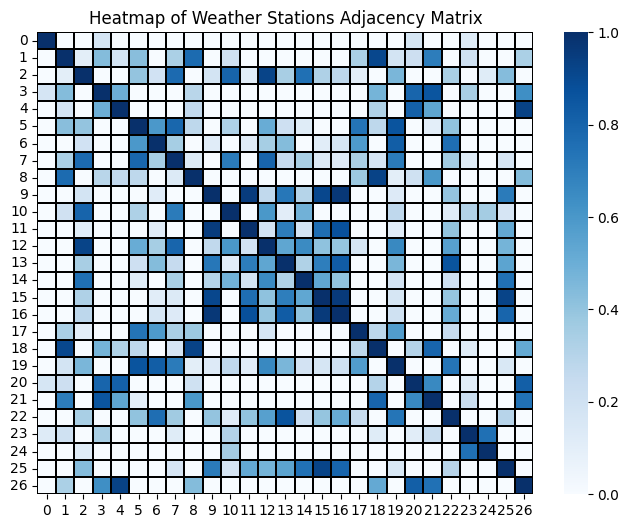

In [50]:
# Display the map of stations locations
map_new = folium.Map()
for i in df_stations.index:
    div = folium.DivIcon(
        html=f"""
            <div style="font-size: 14px; color: white; background-color: #2980ca; border-radius: 50%; text-align: center;">
                {str(i)}
            </div>
        """,
        icon_size=(30, 30)
    )
        
    marker = folium.Marker(location=[df_stations['Latitude'][i], df_stations['Longitude'][i]],
                           icon=div,
                           popup=df_stations['Name'][i]
                        )
    map_new.add_child(marker)

# Heatmap of the adjacency matrix of the weather stations
plt.figure(figsize=(8, 6))
sns.heatmap(adj_matrix, cmap='Blues', linewidths=0.05, linecolor='black', annot=False)
plt.title("Heatmap of Weather Stations Adjacency Matrix")

# Display both the map and the heatmap side by side
display(HTML('<h2>Weather Stations Map</h2>'))
display(map_new)  # Display folium map HTML representation

display(HTML('<h2>Heatmap of Adjacency Matrix</h2>'))
plt.show()

In [6]:
adj_48_split_0 = pd.read_csv('../Results/GWN/48 Hour Forecast/Matrices/adjacency_matrix_0.csv', index_col=0)
adj_48_split_25 = pd.read_csv('../Results/GWN/48 Hour Forecast/Matrices/adjacency_matrix_25.csv', index_col=0)

<Axes: >

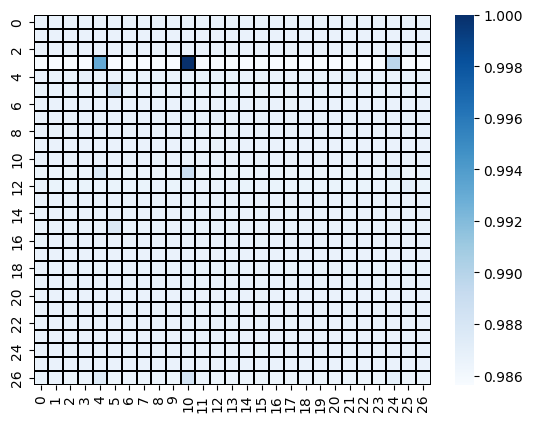

In [7]:
sns.heatmap(adj_48_split_0, cmap='Blues', linewidths=0.05, linecolor='black', annot=False)

<Axes: >

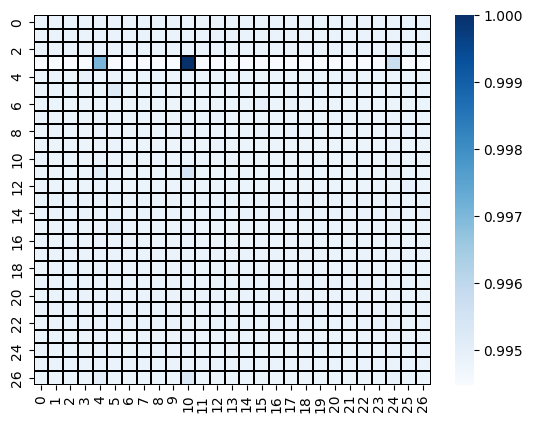

In [8]:
sns.heatmap(adj_48_split_25, cmap='Blues', linewidths=0.05, linecolor='black', annot=False)